## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

### Lucas Ferraz Almendros Mello - 13731671 - sneeze1

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze1.csv') # sneeze1
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172
...,...,...,...,...,...,...
1195,72,0,0,1,51.0,110.470695
1196,6,0,0,0,65.0,45.704558
1197,8,0,0,0,59.0,20.381291
1198,31,0,0,1,20.0,31.376729


In [54]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [55]:
df.isna().sum()

nsneeze     0
alcohol     0
antihist    0
smoker      0
age         0
pollen      0
dtype: int64

In [56]:
df.dtypes

nsneeze       int64
alcohol       int64
antihist      int64
smoker        int64
age         float64
pollen      float64
dtype: object

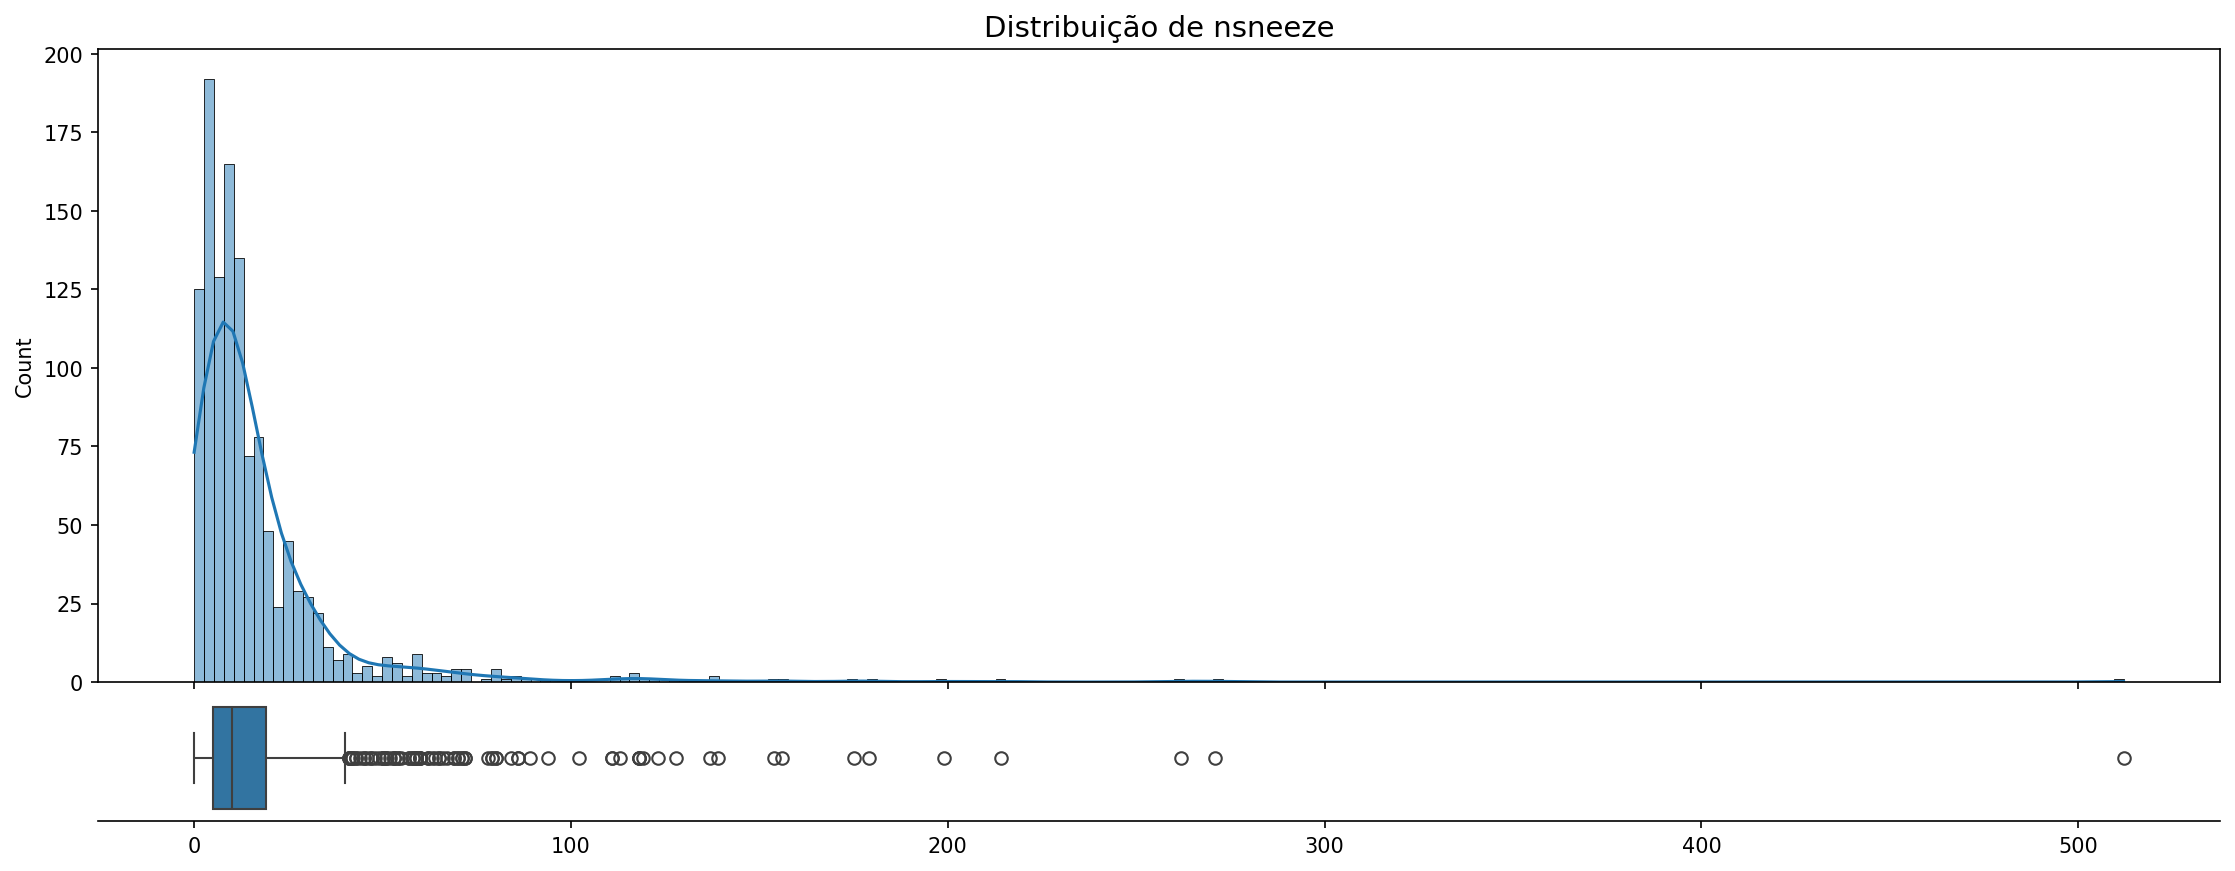

In [57]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=150)

sns.histplot(df['nsneeze'], kde=True, ax=ax)
ax.set_title("Distribuição de nsneeze", fontsize=14)

box_ax = ax.inset_axes([0, -0.22, 1, 0.20])

sns.boxplot(
    data=df,
    x='nsneeze',
    ax=box_ax
)

box_ax.set_yticks([])   
box_ax.set_ylabel("")
box_ax.set_xlabel("")
box_ax.tick_params(axis='x', labelsize=10)

box_ax.spines['left'].set_visible(False)
box_ax.spines['right'].set_visible(False)
box_ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
nsneeze,1200.0,17.093333,27.537245,0.000000,5.000000,10.000000,19.000000,512.00000
alcohol,1200.0,0.299167,0.458084,0.000000,0.000000,0.000000,1.000000,1.00000
antihist,1200.0,0.251667,0.434152,0.000000,0.000000,0.000000,1.000000,1.00000
smoker,1200.0,0.189167,0.391804,0.000000,0.000000,0.000000,0.000000,1.00000
age,1200.0,40.342500,13.324469,18.000000,31.000000,40.000000,49.000000,80.00000
pollen,1200.0,59.566507,30.430699,6.576282,38.017155,54.753465,74.416409,202.92269


In [59]:
bin_vars = ['alcohol', 'antihist', 'smoker']

for v in bin_vars:
    print(f"\nMédias de nsneeze por {v}:\n", df.groupby(v)['nsneeze'].mean())
    print(f"\nDesvio padrão de nsneeze por {v}:\n", df.groupby(v)['nsneeze'].std())
    print(f"\nProporção por grupo: {v}:\n", df[v].value_counts(normalize=True).round(4)*100)


Médias de nsneeze por alcohol:
 alcohol
0    16.122473
1    19.367688
Name: nsneeze, dtype: float64

Desvio padrão de nsneeze por alcohol:
 alcohol
0    27.928659
1    26.496730
Name: nsneeze, dtype: float64

Proporção por grupo: alcohol:
 alcohol
0    70.08
1    29.92
Name: proportion, dtype: float64

Médias de nsneeze por antihist:
 antihist
0    19.668151
1     9.437086
Name: nsneeze, dtype: float64

Desvio padrão de nsneeze por antihist:
 antihist
0    30.541693
1    12.736573
Name: nsneeze, dtype: float64

Proporção por grupo: antihist:
 antihist
0    74.83
1    25.17
Name: proportion, dtype: float64

Médias de nsneeze por smoker:
 smoker
0    15.359712
1    24.524229
Name: nsneeze, dtype: float64

Desvio padrão de nsneeze por smoker:
 smoker
0    26.906906
1    28.997453
Name: nsneeze, dtype: float64

Proporção por grupo: smoker:
 smoker
0    81.08
1    18.92
Name: proportion, dtype: float64


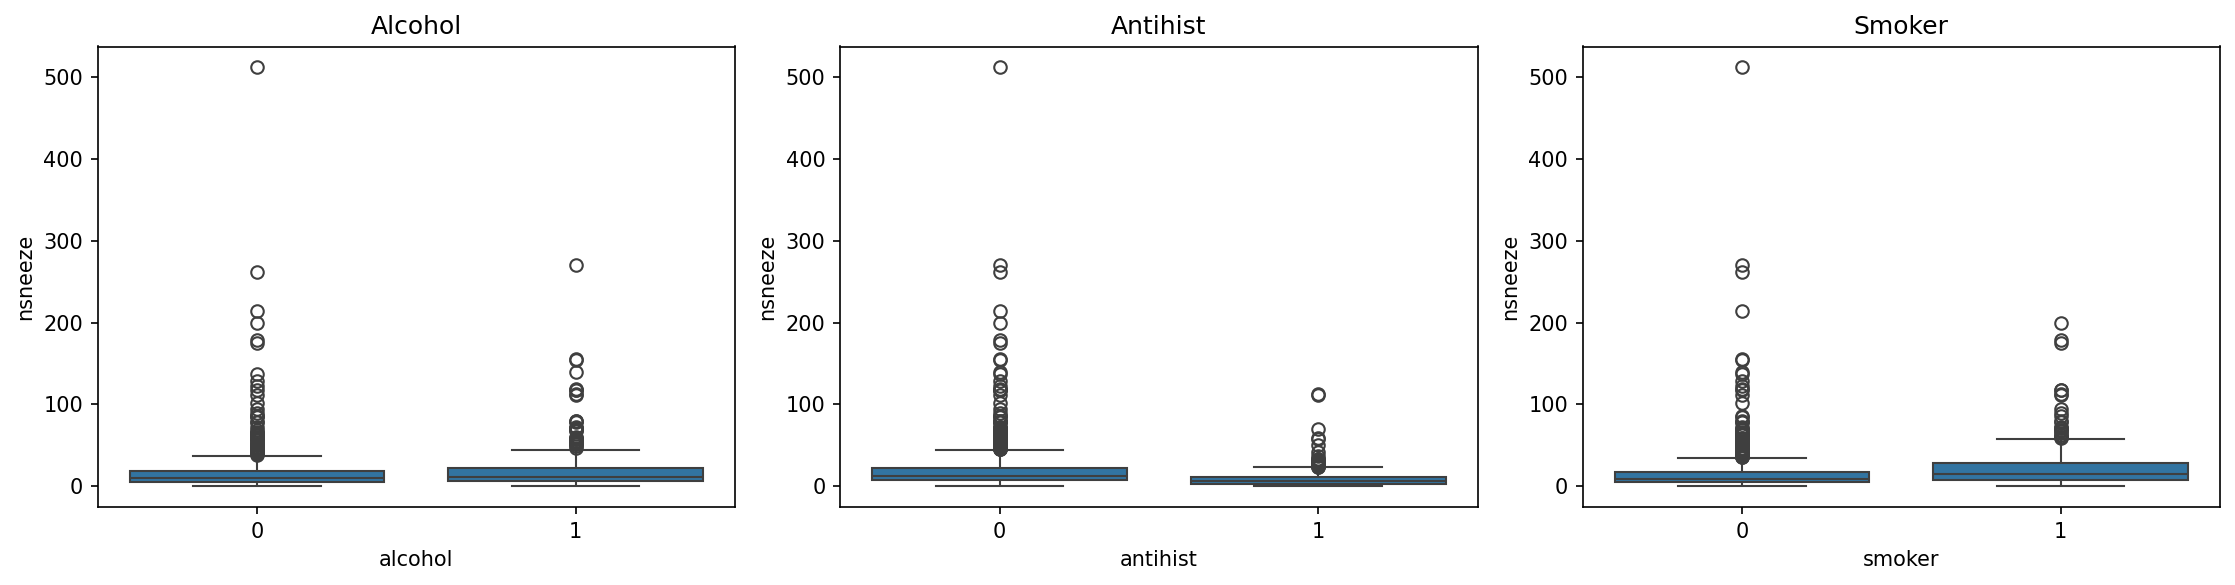

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), dpi=150)

sns.boxplot(df, x='alcohol',   y='nsneeze', ax=axes[0])
axes[0].set_title('Alcohol')

sns.boxplot(df, x='antihist',  y='nsneeze', ax=axes[1])
axes[1].set_title('Antihist')

sns.boxplot(df, x='smoker',    y='nsneeze', ax=axes[2])
axes[2].set_title('Smoker')

plt.tight_layout()
plt.show()

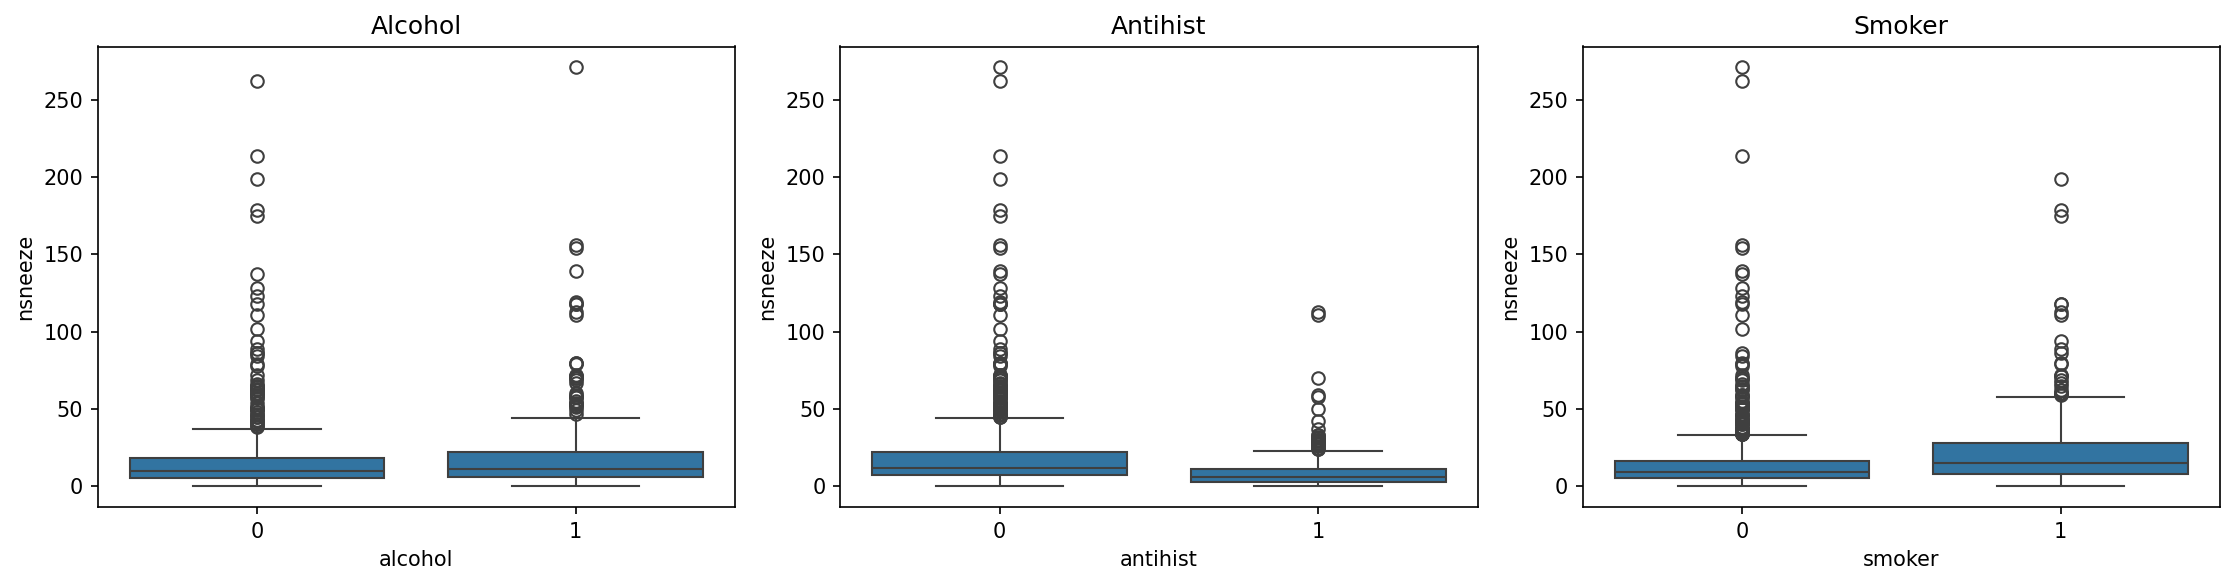

In [61]:
# filtro < 400 apenas para retirar o outlier maior que 500 e melhorar a visualização do boxplot
fig, axes = plt.subplots(1, 3, figsize=(15, 4), dpi=150)

sns.boxplot(df[df.nsneeze < 400], x='alcohol',   y='nsneeze', ax=axes[0])
axes[0].set_title('Alcohol')

sns.boxplot(df[df.nsneeze < 400], x='antihist',  y='nsneeze', ax=axes[1])
axes[1].set_title('Antihist')

sns.boxplot(df[df.nsneeze < 400], x='smoker',    y='nsneeze', ax=axes[2])
axes[2].set_title('Smoker')

plt.tight_layout()
plt.show()

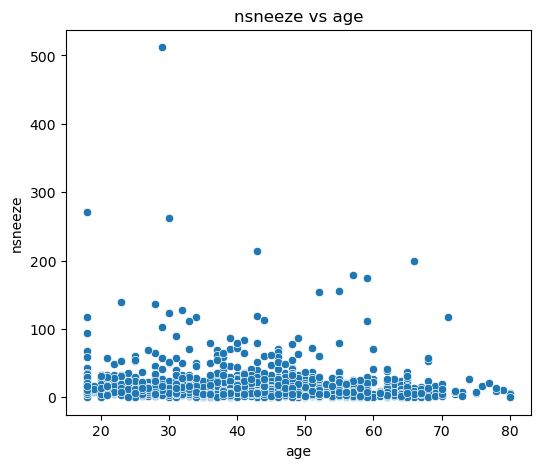

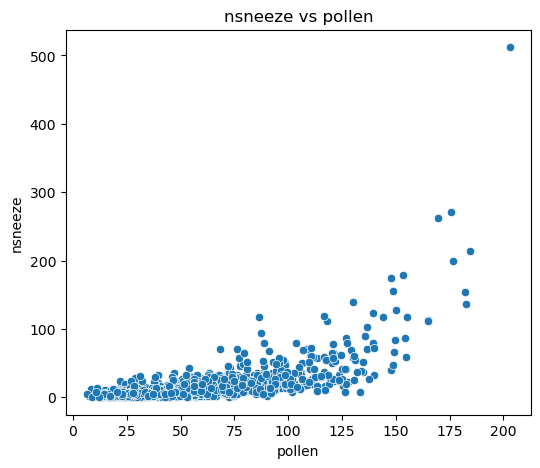

In [62]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['age'], y=df['nsneeze'])
plt.title("nsneeze vs age")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x=df['pollen'], y=df['nsneeze'])
plt.title("nsneeze vs pollen")
plt.show()

In [63]:
print("\nCorrelação age–nsneeze:", df[['age','nsneeze']].corr().iloc[0,1])
print("Correlação pollen–nsneeze:", df[['pollen','nsneeze']].corr().iloc[0,1])


Correlação age–nsneeze: -0.047344058573641525
Correlação pollen–nsneeze: 0.651860797456045


As análises exploratórias indicam que nsneeze apresenta forte assimetria à direita, variância muito superior à média e diversos valores extremos, sugerindo desde já a presença de superdispersão, típica de dados de contagem com alta heterogeneidade.

Ao comparar nsneeze entre grupos, observam-se padrões consistentes:

alcohol mostra um efeito aparentemente positivo, porém de pequena magnitude, exigindo verificação formal de significância;

antihist está associado a uma redução substancial no número médio de espirros;

smoker apresenta médias superiores, indicando aumento da frequência de espirros entre fumantes.

Entre as variáveis contínuas, age apresenta correlação praticamente nula com nsneeze (r ≈ –0.05), sugerindo ausência de associação relevante. Em contraste, pollen exibe correlação positiva elevada (r ≈ 0.65), indicando que a concentração de pólen é um forte determinante do número diário de espirros.

No conjunto, a EDA aponta que antihist, smoker e principalmente pollen devem exercer papel importante na modelagem, enquanto age tende a ter contribuição mínima. As evidências de alta variabilidade reforçam a necessidade de avaliar cuidadosamente o ajuste do modelo de Poisson e investigar a possível superdispersão nas etapas subsequentes.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [64]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                dom, 30 nov 2025   Deviance:                       4949.1
Time:                        11:30:47   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5560      0.026  

O modelo de Poisson identifica pollen, smoker e antihist como os principais determinantes da variação no número de espirros.
Os efeitos de age e alcohol, embora significativos, têm menor impacto substantivo.
Todos os coeficientes são estatisticamente significativos ao nível convencional (p < 0.001)

alcohol → aumento moderado
Consumir álcool está associado a cerca de 24% mais espirros, efeito estatisticamente significativo e não desprezível.

antihist → efeito protetor forte
Redução de aproximadamente 48% na taxa esperada de espirros.
Este é o maior efeito em magnitude absoluta entre as variáveis categóricas.

smoker → aumento expressivo
Fumantes apresentam cerca de 59% mais espirros, consistente com a EDA.

age → impacto negativo pequeno, mas significativo
Apesar do p-valor muito baixo, o efeito prático é pequeno (≈1% por ano).
Significância estatística aqui se deve ao grande n (1200), e não à magnitude.

pollen → principal preditor contínuo
Cada aumento unitário no pólen eleva a taxa em ~2,3%; como pollen possui alta amplitude, o efeito acumulado é muito grande.
Isso é coerente com a correlação previamente observada (≈0.65).


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [65]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

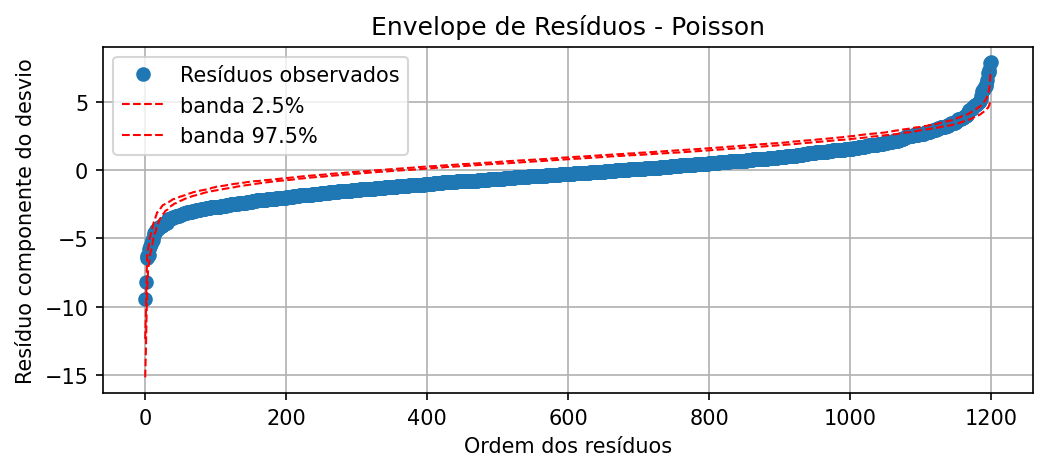

In [66]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

In [67]:
# Cálculo do parâmetro de dispersão
deviance = ajuste_pois.deviance
pearson_chi2 = ajuste_pois.pearson_chi2
gl_residual = ajuste_pois.df_resid

dispersion_pearson = pearson_chi2 / gl_residual
dispersion_deviance = deviance / gl_residual

print(f"Estatística Pearson Chi²: {pearson_chi2:.1f}")
print(f"Graus de liberdade residuais: {gl_residual}")
print(f"Parâmetro de dispersão (Pearson): {dispersion_pearson:.3f}")
print(f"Parâmetro de dispersão (Deviance): {dispersion_deviance:.3f}")

Estatística Pearson Chi²: 5036.8
Graus de liberdade residuais: 1194
Parâmetro de dispersão (Pearson): 4.218
Parâmetro de dispersão (Deviance): 4.145


Analisando o envelope dos resíduos e os parâmetros de dispersão, verifica-se forte evidência de superdispersão nos dados, indicando que o modelo de Poisson não é adequado.

O gráfico de envelope mostra que os resíduos observados ficam sistematicamente fora das bandas de simulação, demonstrando que a variabilidade real dos dados é maior que a esperada pela distribuição de Poisson.

Os parâmetros de dispersão confirmam esse problema: ambos os valores (Pearson = 4.221 e Deviance = 4.145) estão muito acima do valor ideal de 1, caracterizando uma superdispersão severa.

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3847.2
Date:                dom, 30 nov 2025   Deviance:                       1288.8
Time:                        11:30:48   Pearson chi2:                 1.24e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5615      0.059  

In [69]:
print("POISSON:")
print(f"Deviance: {ajuste_pois.deviance:.1f}")
print(f"AIC: {ajuste_pois.aic:.1f}")
print(f"Log-Likelihood: {ajuste_pois.llf:.1f}")
print(f"Dispersão: {ajuste_pois.pearson_chi2/ajuste_pois.df_resid:.3f}")

print("\nBINOMIAL NEGATIVO:")
print(f"Deviance: {ajuste_nb.deviance:.1f}")
print(f"AIC: {ajuste_nb.aic:.1f}")
print(f"Log-Likelihood: {ajuste_nb.llf:.1f}")
print(f"Alpha (dispersão): {ajuste_nb.family.alpha:.3f}")

POISSON:
Deviance: 4949.1
AIC: 9906.3
Log-Likelihood: -4947.1
Dispersão: 4.218

BINOMIAL NEGATIVO:
Deviance: 1288.8
AIC: 7706.4
Log-Likelihood: -3847.2
Alpha (dispersão): 0.200


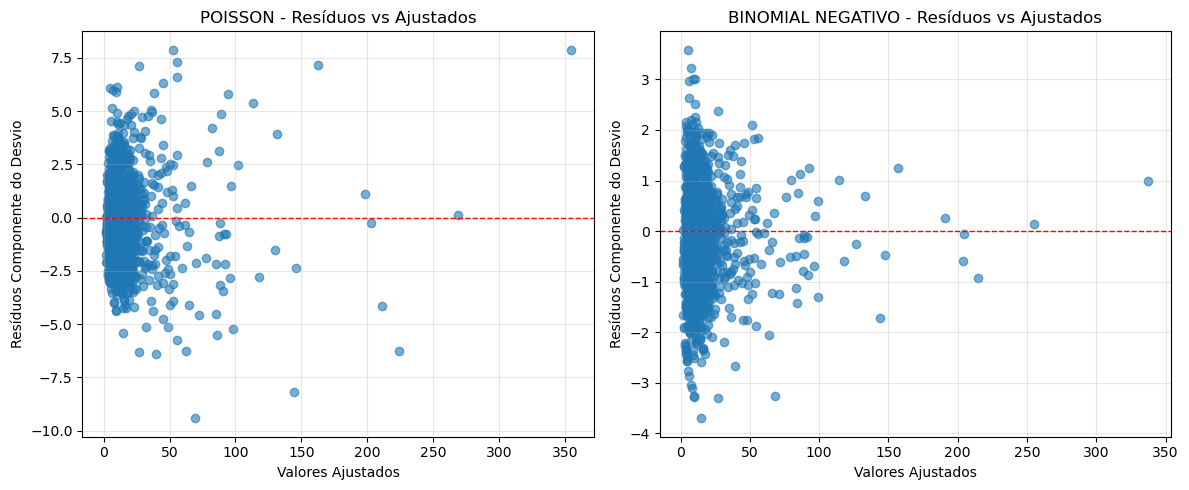

In [70]:
# Gráficos de resíduos componentes do desvio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Poisson - Resíduos vs Valores Ajustados
ax1.scatter(ajuste_pois.fittedvalues, ajuste_pois.resid_deviance, alpha=0.6)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax1.set_xlabel('Valores Ajustados')
ax1.set_ylabel('Resíduos Componente do Desvio')
ax1.set_title('POISSON - Resíduos vs Ajustados')
ax1.grid(True, alpha=0.3)

# Binomial Negativo - Resíduos vs Valores Ajustados
ax2.scatter(ajuste_nb.fittedvalues, ajuste_nb.resid_deviance, alpha=0.6)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax2.set_xlabel('Valores Ajustados')
ax2.set_ylabel('Resíduos Componente do Desvio')
ax2.set_title('BINOMIAL NEGATIVO - Resíduos vs Ajustados')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Com base nas métricas e análise gráfica, o modelo Binomial Negativo é superior ao Poisson para os dados de espirros.

O Binomial Negativo apresenta:

Deviance 74% menor (1288.8 vs 4949.1)

AIC 2200 pontos menor (7706.4 vs 9906.3)

Correção da superdispersão (alpha=0.2 vs 4.218)

Os resíduos do Binomial Negativo mostram distribuição mais homogênea ao redor de zero, indicando melhor ajuste.

Portanto, o Binomial Negativo é mais adequado para modelar os dados de contagem de espirros.



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [71]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


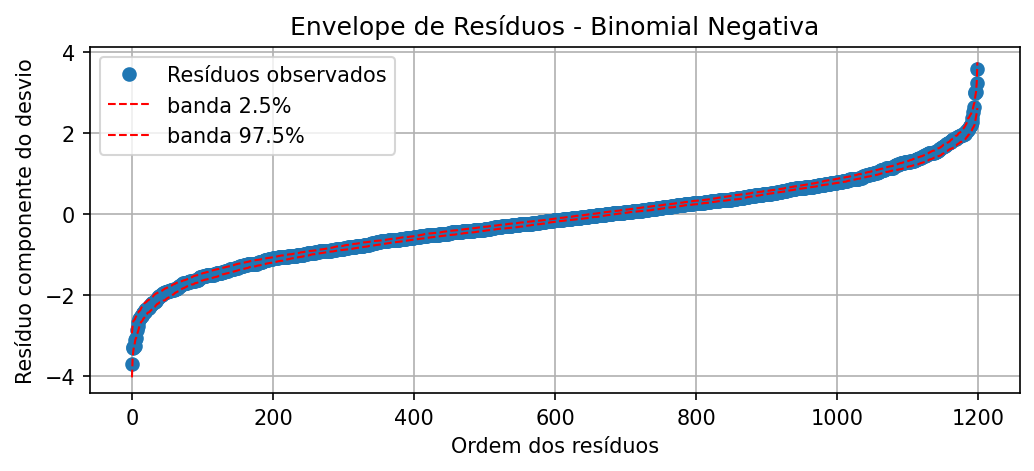

In [72]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [73]:
# Efeito médio marginal para alcohol
def marginal_effect_alcohol(model):
    # Criar dataset com alcohol=0 para todos
    data_0 = df.copy()
    data_0['alcohol'] = 0
    
    # Criar dataset com alcohol=1 para todos  
    data_1 = df.copy()
    data_1['alcohol'] = 1
    
    # Prever com alcohol=0
    pred_0 = model.predict(data_0)
    
    # Prever com alcohol=1
    pred_1 = model.predict(data_1)
    
    # Efeito marginal médio
    effect = np.mean(pred_1 - pred_0)
    
    return effect

# Efeito médio marginal para antihist
def marginal_effect_antihist(model):
    # Criar dataset com antihist=0 para todos
    data_0 = df.copy()
    data_0['antihist'] = 0
    
    # Criar dataset com antihist=1 para todos  
    data_1 = df.copy()
    data_1['antihist'] = 1
    
    # Prever com antihist=0
    pred_0 = model.predict(data_0)
    
    # Prever com antihist=1  
    pred_1 = model.predict(data_1)
    
    # Efeito marginal médio
    effect = np.mean(pred_1 - pred_0)
    
    return effect

# Calcular efeitos marginais
effect_alcohol = marginal_effect_alcohol(ajuste_nb)
effect_antihist = marginal_effect_antihist(ajuste_nb)

print("EFEITOS MÉDIOS MARGINAIS - BINOMIAL NEGATIVO")
print("="*50)
print(f"Efeito do consumo de álcool: {effect_alcohol:.2f} espirros")
print(f"Efeito do anti-histamínico: {effect_antihist:.2f} espirros")

# Interpretação em termos percentuais
mean_espirros = df['nsneeze'].mean()
print(f"\nINTERPRETAÇÃO:")
print(f"Média geral de espirros: {mean_espirros:.2f}")
print(f"Álcool aumenta em {effect_alcohol:.2f} espirros (+{(effect_alcohol/mean_espirros)*100:.1f}%)")
print(f"Anti-histamínico reduz em {abs(effect_antihist):.2f} espirros (-{(abs(effect_antihist)/mean_espirros)*100:.1f}%)")

EFEITOS MÉDIOS MARGINAIS - BINOMIAL NEGATIVO
Efeito do consumo de álcool: 3.80 espirros
Efeito do anti-histamínico: -9.37 espirros

INTERPRETAÇÃO:
Média geral de espirros: 17.09
Álcool aumenta em 3.80 espirros (+22.2%)
Anti-histamínico reduz em 9.37 espirros (-54.8%)


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [74]:
# 1. SEPARAR EM TREINO E TESTE
X = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]
y = df['nsneeze']

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Juntar novamente em DataFrames para usar com statsmodels
df_treino = X_treino.copy()
df_treino['nsneeze'] = y_treino

df_teste = X_teste.copy()
df_teste['nsneeze'] = y_teste

print(f"Tamanho do conjunto de treino: {len(df_treino)}")
print(f"Tamanho do conjunto de teste: {len(df_teste)}")

# 2. AJUSTAR MODELOS NO TREINO
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# Modelo Poisson no treino
modelo_pois_treino = smf.glm(
    formula=formula,
    data=df_treino,
    family=sm.families.Poisson()
)
ajuste_pois_treino = modelo_pois_treino.fit()

# Modelo Binomial Negativo no treino
modelo_nb_treino = smf.glm(
    formula=formula,
    data=df_treino,
    family=sm.families.NegativeBinomial(alpha=0.2)
)
ajuste_nb_treino = modelo_nb_treino.fit()

# 3. FAZER PREDIÇÕES NO TESTE
pred_pois_teste = ajuste_pois_treino.predict(df_teste)
pred_nb_teste = ajuste_nb_treino.predict(df_teste)

# 4. CALCULAR MÉTRICAS DE PREDIÇÃO
eqm_pois = mean_squared_error(y_teste, pred_pois_teste)
eam_pois = mean_absolute_error(y_teste, pred_pois_teste)

eqm_nb = mean_squared_error(y_teste, pred_nb_teste)
eam_nb = mean_absolute_error(y_teste, pred_nb_teste)

# 5. COMPARAR RESULTADOS
print("\n" + "="*60)
print("DESEMPENHO PREDITIVO - CONJUNTO DE TESTE")
print("="*60)

print(f"\n{'Métrica':<15} {'Poisson':<12} {'Binomial Neg':<12} {'Diferença':<12}")
print("-" * 60)
print(f"{'EQM':<15} {eqm_pois:<12.2f} {eqm_nb:<12.2f} {eqm_pois - eqm_nb:<12.2f}")
print(f"{'EAM':<15} {eam_pois:<12.2f} {eam_nb:<12.2f} {eam_pois - eam_nb:<12.2f}")

print(f"\n{'Métrica':<15} {'Poisson':<12} {'Binomial Neg':<12} {'Melhoria %':<12}")
print("-" * 60)
melhoria_eqm = ((eqm_pois - eqm_nb) / eqm_pois) * 100
melhoria_eam = ((eam_pois - eam_nb) / eam_pois) * 100
print(f"{'EQM':<15} {eqm_pois:<12.2f} {eqm_nb:<12.2f} {melhoria_eqm:<12.1f}%")
print(f"{'EAM':<15} {eam_pois:<12.2f} {eam_nb:<12.2f} {melhoria_eam:<12.1f}%")

# 6. COMPARAR COM CRITÉRIOS DE AJUSTE NO TREINO
print("\n" + "="*60)
print("CRITÉRIOS DE AJUSTE - CONJUNTO DE TREINO")
print("="*60)

print(f"\n{'Métrica':<20} {'Poisson':<12} {'Binomial Neg':<12}")
print("-" * 50)
print(f"{'Deviance':<20} {ajuste_pois_treino.deviance:<12.1f} {ajuste_nb_treino.deviance:<12.1f}")
print(f"{'AIC':<20} {ajuste_pois_treino.aic:<12.1f} {ajuste_nb_treino.aic:<12.1f}")
print(f"{'Log-Likelihood':<20} {ajuste_pois_treino.llf:<12.1f} {ajuste_nb_treino.llf:<12.1f}")

# 7. ANÁLISE COMPARATIVA
print("\n" + "="*60)
print("CONCLUSÕES")
print("="*60)

print("\n1. DESEMPENHO PREDITIVO (TESTE):")
if eqm_nb < eqm_pois and eam_nb < eam_pois:
    print("   → Binomial Negativo tem melhor desempenho preditivo")
else:
    print("   → Poisson tem melhor desempenho preditivo")

print("\n2. COMPARAÇÃO COM CRITÉRIOS DE AJUSTE (TREINO):")
if (ajuste_nb_treino.aic < ajuste_pois_treino.aic and 
    ajuste_nb_treino.deviance < ajuste_pois_treino.deviance):
    print("   → Critérios de ajuste concordam com desempenho preditivo")
else:
    print("   → Há divergência entre critérios de ajuste e desempenho preditivo")

print("\n3. INTERPRETAÇÃO:")
print("   - EQM: penaliza mais erros grandes (valores extremos)")
print("   - EAM: média simples dos erros absolutos")
print("   - Menores valores indicam melhor desempenho")

Tamanho do conjunto de treino: 960
Tamanho do conjunto de teste: 240

DESEMPENHO PREDITIVO - CONJUNTO DE TESTE

Métrica         Poisson      Binomial Neg Diferença   
------------------------------------------------------------
EQM             260.05       251.02       9.03        
EAM             7.02         6.99         0.03        

Métrica         Poisson      Binomial Neg Melhoria %  
------------------------------------------------------------
EQM             260.05       251.02       3.5         %
EAM             7.02         6.99         0.4         %

CRITÉRIOS DE AJUSTE - CONJUNTO DE TREINO

Métrica              Poisson      Binomial Neg
--------------------------------------------------
Deviance             3851.2       1010.4      
AIC                  7811.4       6134.6      
Log-Likelihood       -3899.7      -3061.3     

CONCLUSÕES

1. DESEMPENHO PREDITIVO (TESTE):
   → Binomial Negativo tem melhor desempenho preditivo

2. COMPARAÇÃO COM CRITÉRIOS DE AJUSTE (TREINO):
 

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [75]:
q1 = df.pollen.quantile(0.25)
q3 = df.pollen.quantile(0.75)
q1, q3

# Perfis para previsão
df_prev = pd.DataFrame({
    "alcohol": [0, 1],
    "antihist": [1, 0],
    "smoker": [0, 1],
    "age": [30, 50],
    "pollen": [q1, q3]
})

df_prev

prev_nb = ajuste_nb_treino.predict(df_prev)
prev_nb

print("Previsões do número esperado de espirros:")
print(f"Indivíduo A (pollen = Q1): {prev_nb.iloc[0]:.3f}")
print(f"Indivíduo B (pollen = Q3): {prev_nb.iloc[1]:.3f}")

Previsões do número esperado de espirros:
Indivíduo A (pollen = Q1): 4.007
Indivíduo B (pollen = Q3): 30.829
